In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

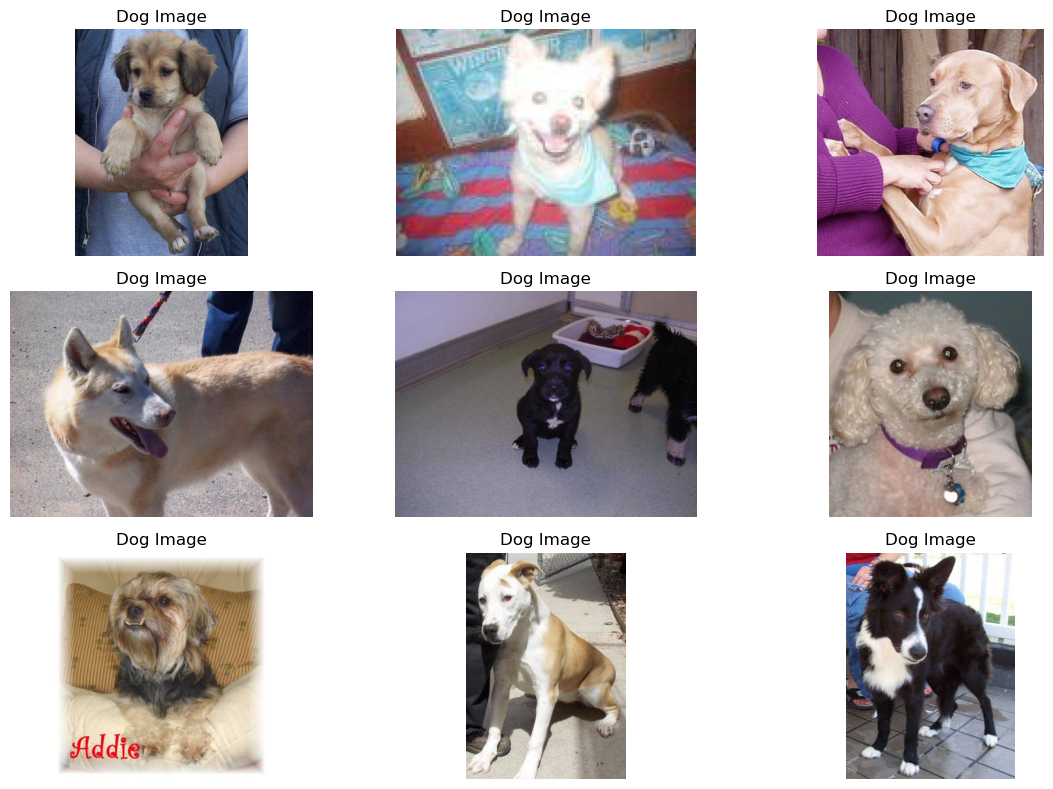

In [40]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "/Users/sguerschuny/Downloads/dogs-vs-cats"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()


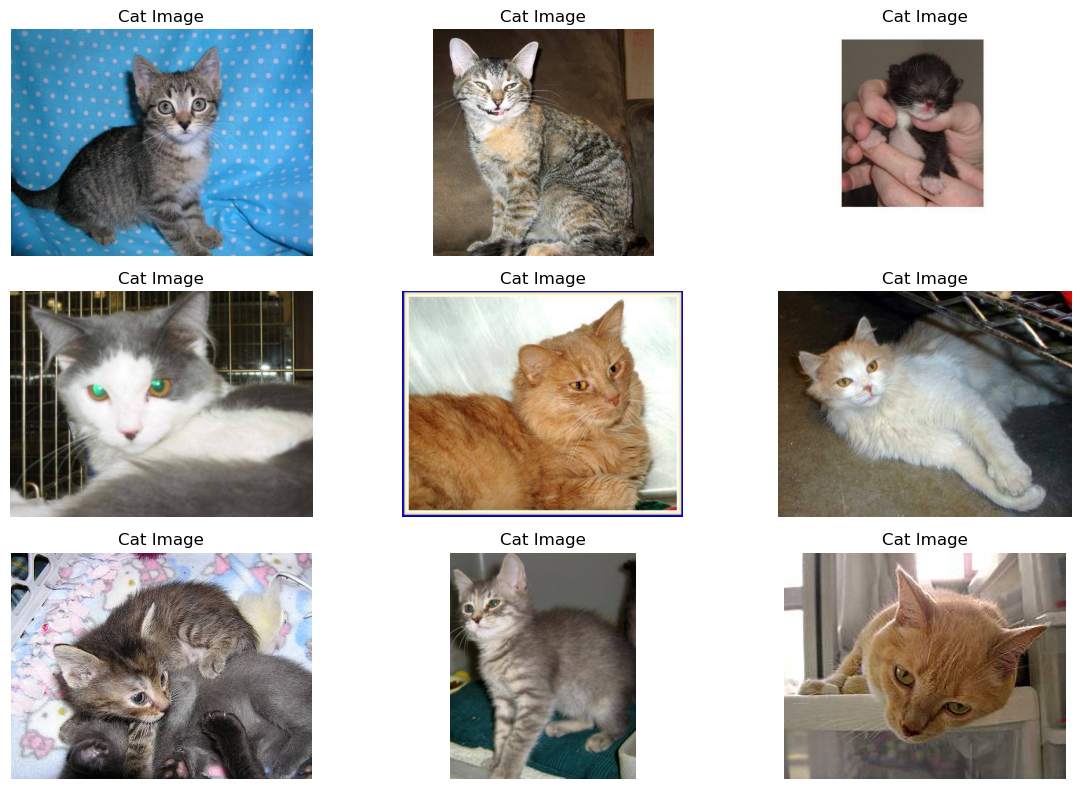

In [41]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Ruta al directorio que contiene sus datos de imagen
data_dir = "/Users/sguerschuny/Downloads/dogs-vs-cats"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

In [42]:
batch_size = 32
img_height = 200
img_width = 200
data_dir= '/Users/sguerschuny/Downloads/dogs-vs-cats'

In [43]:
#Defino las variables train_ds y val_ds
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )
  

Found 24995 files belonging to 2 classes.
Using 19996 files for training.


In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24995 files belonging to 2 classes.
Using 4999 files for validation.


In [45]:
#Compruebo que haya dos clases

class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


2024-09-25 11:18:32.293386: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


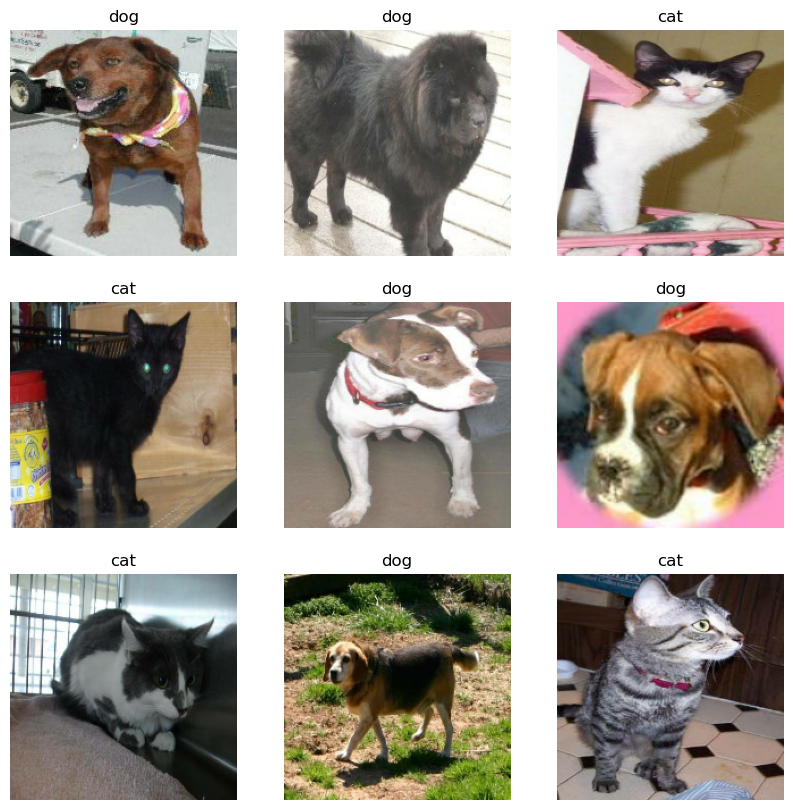

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras import layers
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [48]:
from keras.optimizers import Adam


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 200, 200, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,143,970 (19.62 MB)

 Trainable params: 5,143,970 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
epochs=5
history = model.fit( train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 194ms/step - accuracy: 0.6378 - loss: 0.6413 - val_accuracy: 0.7103 - val_loss: 0.5515
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.7761 - loss: 0.4730 - val_accuracy: 0.7912 - val_loss: 0.4491
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.8200 - loss: 0.3978 - val_accuracy: 0.8036 - val_loss: 0.4523
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.8645 - loss: 0.3106 - val_accuracy: 0.7958 - val_loss: 0.5460
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 188ms/step - accuracy: 0.9142 - loss: 0.2081 - val_accuracy: 0.7922 - val_loss: 0.6401


In [52]:
from tensorflow.keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("../models/model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 9, verbose = 1, mode = "auto")
hist = model.fit(train_ds, steps_per_epoch = 100, validation_data = val_ds, validation_steps = 10, epochs = 10, callbacks = [checkpoint, early])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9460 - loss: 0.1258
Epoch 1: val_accuracy improved from -inf to 0.72812, saving model to ../models/model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.9460 - loss: 0.1258 - val_accuracy: 0.7281 - val_loss: 1.0180
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9430 - loss: 0.1367
Epoch 2: val_accuracy improved from 0.72812 to 0.78438, saving model to ../models/model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9431 - loss: 0.1367 - val_accuracy: 0.7844 - val_loss: 0.6306
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9580 - loss: 0.1128
Epoch 3: val_accuracy did not improve from 0.78438
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9580 - loss: 0.1129 - val_accuracy: 0.7719 - val_loss: 0.6889
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9582 - loss: 0.1032
Epoch 4: val_accuracy did not improve from 0.78438
1

2024-09-25 11:36:35.035027: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 7: val_accuracy did not improve from 0.80313
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9681 - loss: 0.0983 - val_accuracy: 0.7844 - val_loss: 0.9620
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9674 - loss: 0.0828
Epoch 8: val_accuracy improved from 0.80313 to 0.81250, saving model to ../models/model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9674 - loss: 0.0828 - val_accuracy: 0.8125 - val_loss: 0.5419
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9641 - loss: 0.0932
Epoch 9: val_accuracy did not improve from 0.81250
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.9642 - loss: 0.0931 - val_accuracy: 0.7906 - val_loss: 0.7771
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.9657 - loss: 0.0851
Epoch 10: val_accuracy did not improve from 0.81250
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9657 - loss: 0.0851 - val_accuracy: 0.7969 - val_loss: 1.0078


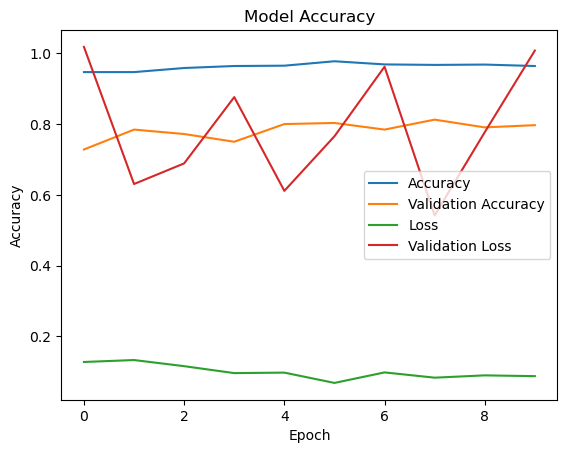

In [53]:
# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

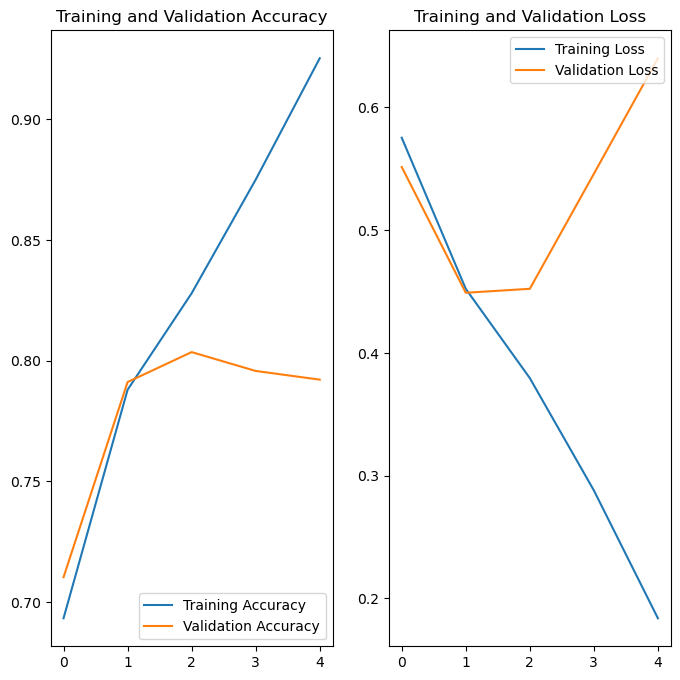

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
#Creo una variable para la imagen aleatoria

numero= np.random.randint(1000)
image_path = f"/Users/sguerschuny/Downloads/dogs-vs-cats/cat/cat.{numero}.jpg"


img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
This image most likely belongs to cat with a 71.74 percent confidence.
